In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from sklearn.neighbors import KNeighborsRegressor

import warnings
warnings.filterwarnings ('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv')
df

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [3]:
df.shape

(213, 11)

In [4]:
# lets name the column
df.columns = ['id','refractive_index','sodium','magnesium','aluminum','silicon','potassium','calcium','barium','iron','class']


In [5]:
df

,id,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron,class
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                213 non-null    int64  
 1   refractive_index  213 non-null    float64
 2   sodium            213 non-null    float64
 3   magnesium         213 non-null    float64
 4   aluminum          213 non-null    float64
 5   silicon           213 non-null    float64
 6   potassium         213 non-null    float64
 7   calcium           213 non-null    float64
 8   barium            213 non-null    float64
 9   iron              213 non-null    float64
 10  class             213 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.4 KB


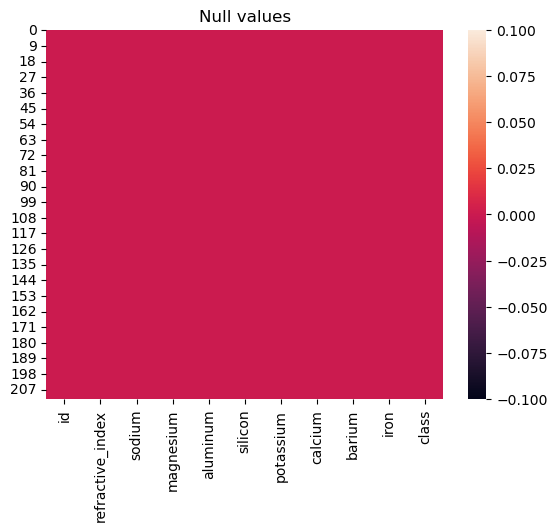

In [7]:
# cheaking the null values
sns.heatmap(df.isnull())
plt.title("Null values")
plt.show()

In [8]:
df.isnull().sum().sum()

0

In [9]:
df.describe()

,id,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron,class
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,108.000000,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,61.631972,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,2.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,55.000000,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,108.000000,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,161.000000,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [10]:
df['class'].value_counts()

2    76
1    69
7    29
3    17
5    13
6     9
Name: class, dtype: int64

In [11]:
# We know that Class 1 to 4 - Window Set & Class 5-7 -Non Window Set

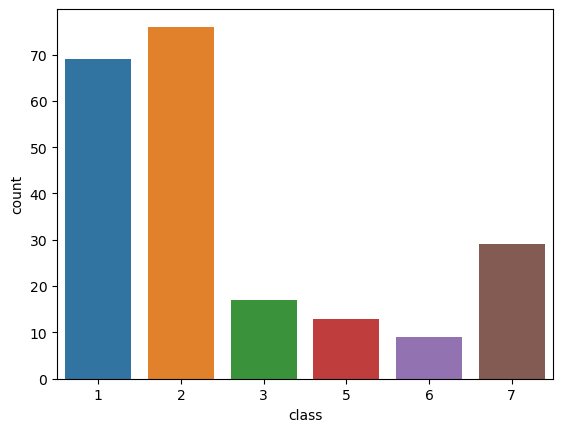

In [12]:
sns.countplot(x='class',data=df)
plt.show()

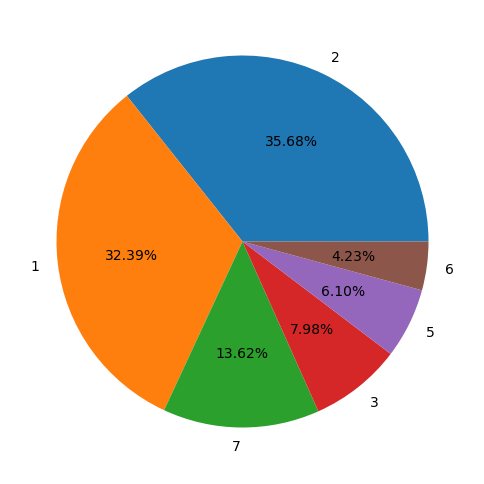

In [13]:
# piechart
plt.figure(figsize=(6,8))
plt.pie(df['class'].value_counts().values,labels =df['class'].value_counts().index,autopct='%1.2f%%')
plt.show()

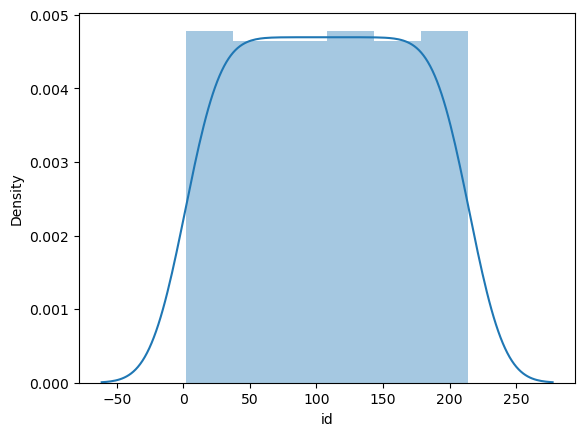

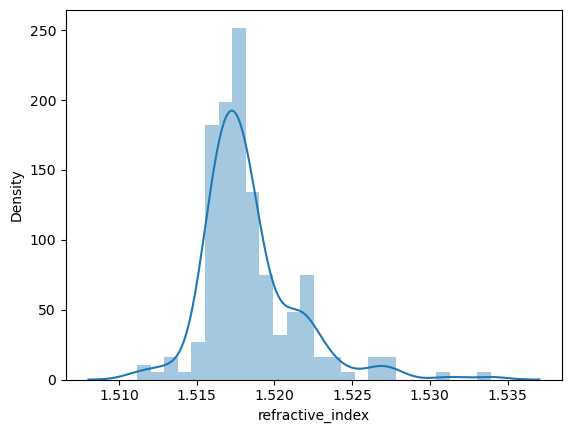

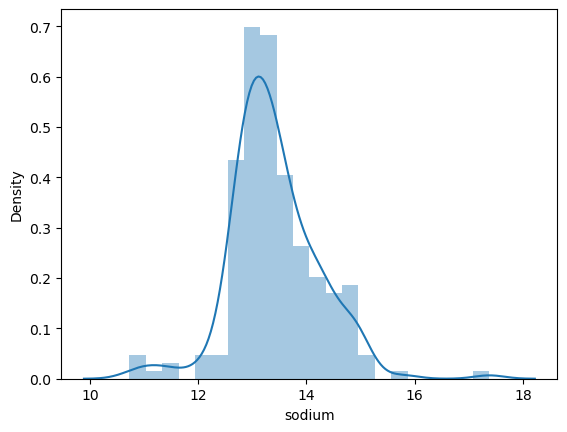

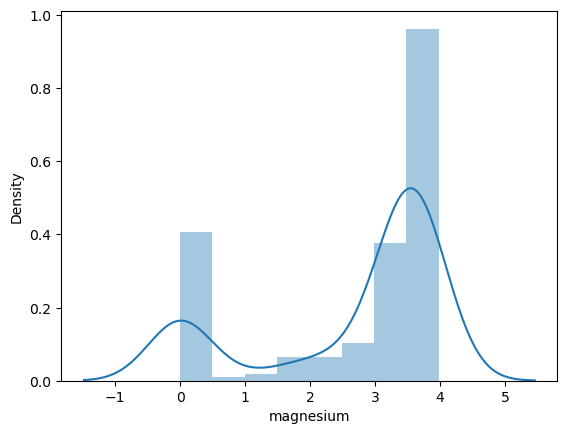

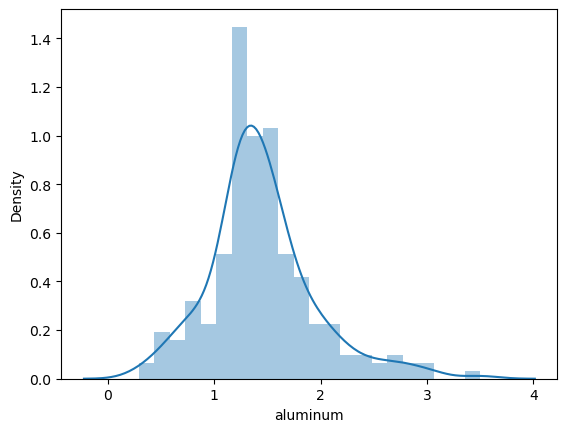

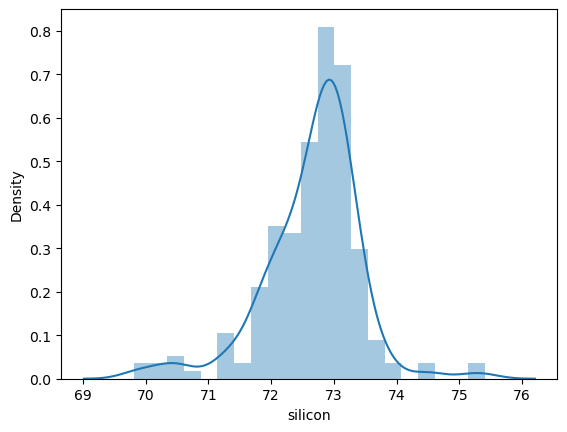

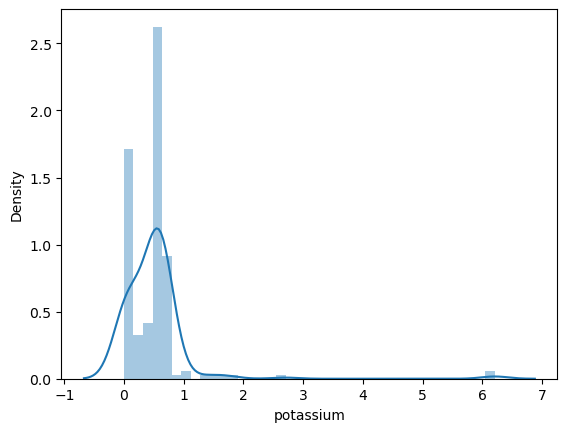

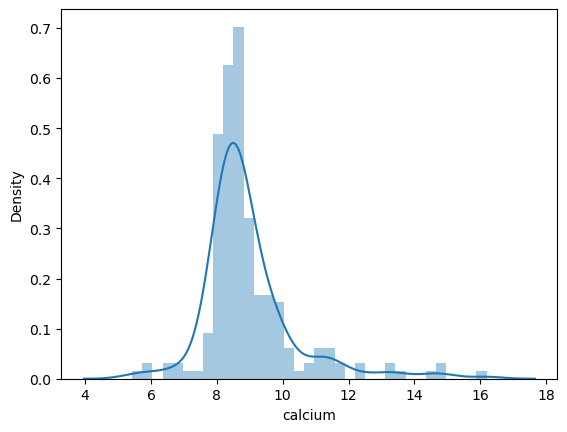

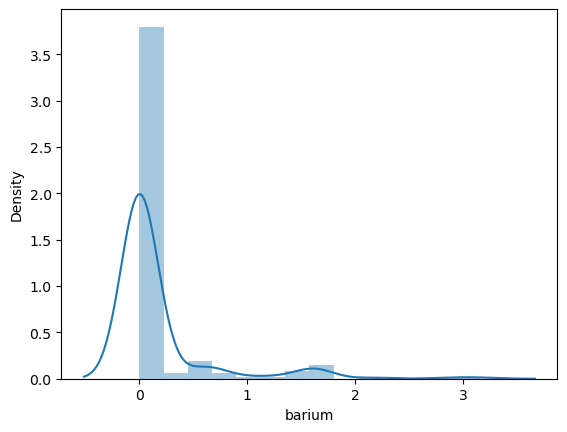

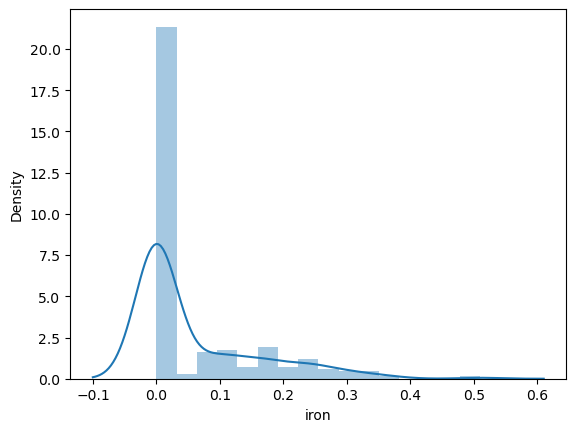

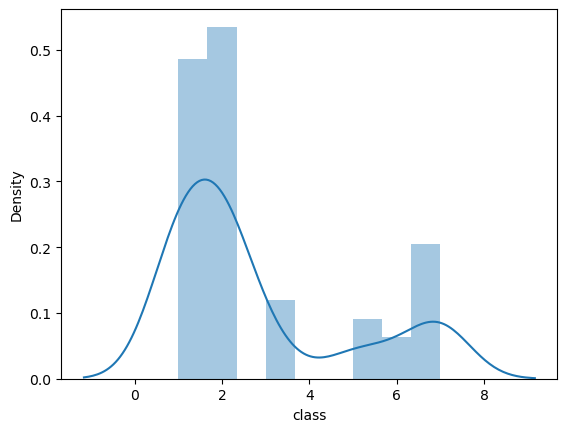

In [14]:
for i in df.columns:
    plt.figure()
    sns.distplot(df[i])
    
plt.show()

In [15]:
df.describe()

,id,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron,class
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,108.000000,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,61.631972,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,2.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,55.000000,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,108.000000,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,161.000000,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [16]:
df.corr()

,id,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron,class
id,1.000000,-0.065721,0.380767,-0.647082,0.488475,0.052634,-0.002306,0.090257,0.451437,-0.078151,0.878113
refractive_index,-0.065721,1.000000,-0.193436,-0.128118,-0.405671,-0.540010,-0.287900,0.812495,0.001062,0.145791,-0.161322
sodium,0.380767,-0.193436,1.000000,-0.276486,0.157928,-0.068519,-0.265520,-0.275314,0.327233,-0.240802,0.504983
magnesium,-0.647082,-0.128118,-0.276486,1.000000,-0.480035,-0.160359,0.009397,-0.444559,-0.492149,0.086906,-0.744004
aluminum,0.488475,-0.405671,0.157928,-0.480035,1.000000,-0.009226,0.324484,-0.260372,0.478936,-0.076456,0.597754
silicon,0.052634,-0.540010,-0.068519,-0.160359,-0.009226,1.000000,-0.197684,-0.210141,-0.104361,-0.097674,0.147767
potassium,-0.002306,-0.287900,-0.265520,0.009397,0.324484,-0.197684,1.000000,-0.318649,-0.043790,-0.009586,-0.012765
calcium,0.090257,0.812495,-0.275314,-0.444559,-0.260372,-0.210141,-0.318649,1.000000,-0.113121,0.124674,0.000372
barium,0.451437,0.001062,0.327233,-0.492149,0.478936,-0.104361,-0.043790,-0.113121,1.000000,-0.059729,0.574896
iron,-0.078151,0.145791,-0.240802,0.086906,-0.076456,-0.097674,-0.009586,0.124674,-0.059729,1.000000,-0.191090


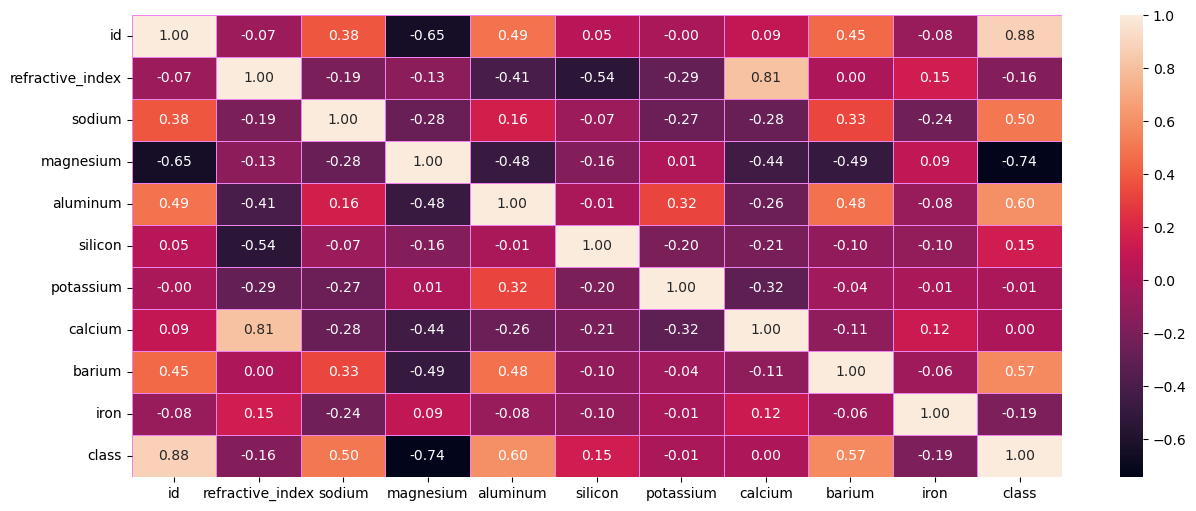

In [17]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,linecolor='violet',fmt='.2f')
plt.show()

In [18]:
df.skew()

id                  0.000000
refractive_index    1.639658
sodium              0.457318
magnesium          -1.154323
aluminum            0.900017
silicon            -0.744546
potassium           6.549276
calcium             2.040591
barium              3.406749
iron                1.747173
class               1.108861
dtype: float64

In [19]:
# Stadardizing Data using Stadard Scaler
X=df.drop(columns=['class'])
Y=df['class']

In [20]:
Scaler=StandardScaler()
X_scale=Scaler.fit_transform(X)

In [21]:
X_scale

array([[-1.72393811, -0.2451006 ,  0.59188032, ..., -0.79259935,
        -0.35380764, -0.58830108],
       [-1.70767455, -0.71682556,  0.15094587, ..., -0.82773435,
        -0.35380764, -0.58830108],
       [-1.69141098, -0.22860672, -0.24099586, ..., -0.51854637,
        -0.35380764, -0.58830108],
       ...,
       [ 1.69141098,  0.75772729,  1.16754474, ..., -0.36395239,
         2.94550057, -0.58830108],
       [ 1.70767455, -0.60796596,  1.19204109, ..., -0.33584439,
         2.80467644, -0.58830108],
       [ 1.72393811, -0.4100394 ,  1.00831841, ..., -0.2374664 ,
         3.00585377, -0.58830108]])

In [22]:
# lets build up Model now
# Spliting the data

X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, test_size=.2,random_state=5)

In [23]:
print('X train:',X_train.shape)
print('Y train:',Y_train.shape)
print('X test:',X_test.shape)
print('Y test:',Y_test.shape)

X train: (170, 10)
Y train: (170,)
X test: (43, 10)
Y test: (43,)


In [24]:
# Linear regression
lr=LinearRegression()

In [25]:
lr.fit(X_train,Y_train)

LinearRegression()

In [26]:
lr.score(X_train,Y_train)

0.9052146976656916

In [27]:
y_pred=lr.predict(X_test)

In [28]:
r2_score(Y_test,y_pred)

0.8787496749473462